<img src="resources/office-supplies.jpg" alt="Office Supplies" width="500" height="500">

# Defining Objectives and Questions

**Pens and Printers** was founded in 1984 and provides high quality office products to large organizations. We are a trusted provider of everything from pens and notebooks to desk chairs and monitors. We don’t produce our own products but sell those made by other companies.
We have built long lasting relationships with our customers and they trust us to provide them with the best products for them. As the way in which consumers buy products is changing, our sales tactics have to change too. Launching a new product line is expensive and we need to make sure we are using the best techniques to sell the new product effectively. The best approach may vary for each new product so we need to learn quickly what works and what doesn’t.

### New Product Sales Method
Six weeks ago we launched a new line of office stationery. Despite the world becoming increasingly digital, there is still demand for notebooks, pens and sticky notes.
Our focus has been on selling products to enable our customers to be more creative, focused on tools for brainstorming. We have tested three different sales strategies for this, targeted email and phone calls, as well as combining the two.
- **Email:** Customers in this group received an email when the product line was launched, and a further email three weeks later. This required very little work for the team.
- **Call:** Customers in this group were called by a member of the sales team. On average members of the team were on the phone for around thirty minutes per customer.
- **Email and call:** Customers in this group were first sent the product information email, then called a week later by the sales team to talk about their needs and how this new product may support their work. The email required little work from the team, the call was around ten minutes per customer.

### Questions
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, which method would you recommend we continue to use?

# Data collection
We are using data from the sales teams that includes sales from the past 6 weeks. The information that we have is:
| Column Name       | Details                                                                             |
|-------------------|-------------------------------------------------------------------------------------|
| week              | Week sale was made, counted as weeks since product launch                           |
| sales_method      | Character, which of the three sales methods were used for that customer             |
| customer_id       | Character, unique identifier for the customer                                       |
| nb_sold           | Numeric, number of new products sold                                                |
| revenue           | Numeric, revenue from the sales, rounded to 2 decimal places.                       |
| years_as_customer | Numeric, number of years customer has been buying from us (company founded in 1984) |
| nb_site_visits    | Numeric, number of times the customer has visited our website in the last 6 months  |
| state             | Character, location of the customer i.e. where orders are shipped                   |

# Data Cleaning and Validation

In [22]:
# Environment setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_palette('colorblind')

In [23]:
# Import data
sales_unclean = pd.read_csv("data/product_sales.csv")
sales_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


After importing the data, we can already see that there are 1074 missing values in the revenue column. This column is crucial to our analysis, so we must decide on how to deal with the missing values. All of the data types look correct.

In [25]:
sales_unclean.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


The company was founded in 1984, so the values of years_as_customer can't be higher than 41 (2025 - 1984). Otherwise the other maximums and minimums look reasonable.

In [27]:
# Count unique values in each column
sales_unclean.nunique()

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64

## Summary
- **week:** no cleaning needed
- **sales_method:** there were 5 unique values ('Email', 'Email + Call', 'Call', 'em + call', 'email') when there should have only be 3 ('Email', 'Email + Call', 'Call')
- **customer_id:** every id is unique, no cleaning needed
- **nb_sold:** no cleaning needed
- **revenue:** there were 1074 missing values which were imputed based on the median when grouped by nb_sold and sales_method (the two columns with strong relationships with revenue)
- **years_as_customer:** there were 2 impossible values higher than the number of years since the company was founded in 1984, which were replaced with the maximum possible value (41)
- **nb_site_visits:** no cleaning needed
- **state:** all 50 states are represented in the data, confirmed by checking for typos

In [28]:
# Typos would have low value counts
state_counts = sales_unclean['state'].value_counts().sort_values().reset_index()
state_counts.columns = ['State', 'Customer Count']
state_counts

,State,Customer Count
0,Vermont,28
1,North Dakota,30
2,Wyoming,33
3,Delaware,34
4,Alaska,40
5,South Dakota,41
6,Rhode Island,43
7,Montana,45
8,New Hampshire,53
9,Idaho,62


In [29]:
# Create new cleaned dataframe
sales = sales_unclean.copy()

# Replace impossible values with max possible value
sales['years_as_customer'] = sales['years_as_customer'].apply(lambda x: min(x, 41))
sales['years_as_customer'].max()

41

In [30]:
# Find the unique values of the sales_method column
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [31]:
# Clean bad data and confirm only 3 unique values
sales['sales_method'] = sales['sales_method'].replace({
    'em + call': 'Email + Call',
    'email': 'Email'
})
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

Now for the missing revenue values. Over 7% of our data is a little too much to comfortably drop. The other options are to impute the data based on either statistical averages or based on relational value. If it is strongly correlated with any of the other columns, we would want to use the later method. My initial instinct is to check relationship with with nb_sold. We don't have data on the specific products or their individual prices that make up the revenue calculation, but the intuition of "sell more, more revenue" is still worth exploring.

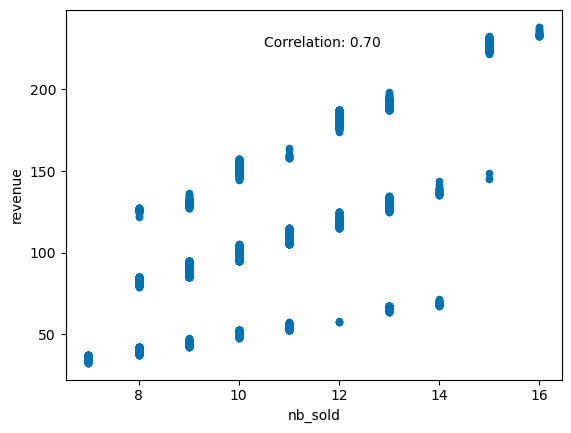

In [33]:
# Check for relationship between nb_sold and revenue
sales.plot.scatter(x='nb_sold', y='revenue')

correlation = sales['nb_sold'].corr(sales['revenue'])
plt.text(0.4, 0.9, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes)
plt.show()

Now this is an interesting plot indeed. There is a clear, strong correlation between revenue and nb_sold, but along three distinct trendlines. My first instinct is that we have 3 distinct sales_methods, so either those sales_methods have their own distinct price ranges or there is some other categorical factor with 3 distinct price ranges, such as 3 unique products. Without individual product sales information, we cannot know for sure, but we can add sales_method as a third variable in the plot.

<Axes: xlabel='nb_sold', ylabel='revenue'>

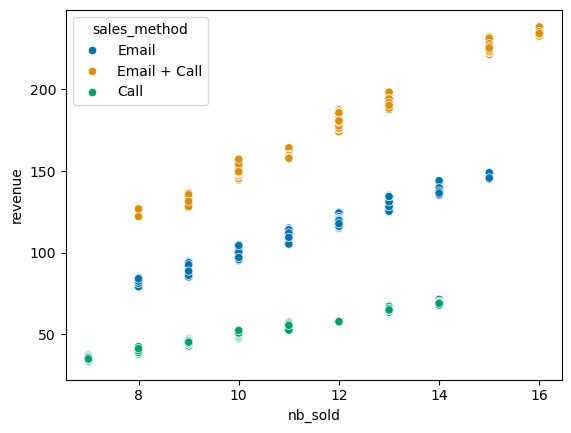

In [35]:
sns.scatterplot(data=sales,
                x='nb_sold',
                y='revenue',
                hue='sales_method'
               )

Our intuition was correct and the three trendlines are neatly delineated by sales_method, which means that both sales_method and nb_sold are strongly correlated with revenue.

Before we can impute the missing values, we have to make sure that revenue is not strongly correlated with any other columns.

<Axes: >

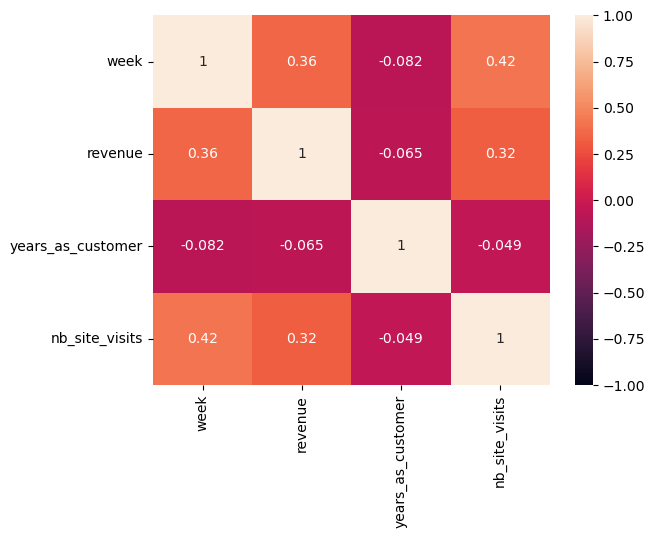

In [37]:
sns.heatmap(sales.iloc[:,[0] + list(range(4,7))].corr(), vmin=-1, vmax=1, annot=True)

We can see that no other numerical columns are strongly correlated with revenue. Now let's check state, the last categorical column.

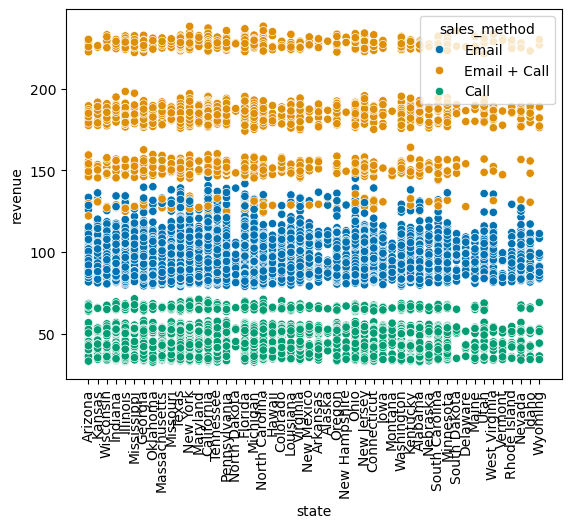

In [39]:
sns.scatterplot(x='state', y='revenue', data=sales, hue='sales_method')
plt.xticks(rotation=90)
plt.show()

We can see that state does not have a strong relationship with revenue as opposed to sales_method. The final step before imputing the missing revenue values is to decide whether to use the mean or median. This will depend on the presence of outliers. Outliers will pull the mean far away from the median.

In [41]:
sales.groupby('sales_method')['revenue'].skew()

sales_method
Call            0.453499
Email           0.834104
Email + Call    0.077410
Name: revenue, dtype: float64

A skewness value greater than 0.5 indicates a moderately right skewed distribution with positive outliers. The combination sales_method is fairly symmetrical, but we'll use the median relative to nb_sold and sales_method for all missing values for consistency, as it works for symmetrical distributions as well as asymmetrical ones.

In [43]:
# Find the grouped median revenue
grouped_median = sales.groupby(['nb_sold', 'sales_method'])['revenue'].transform('median')

# Impute missing values and confirm
sales['revenue'] = sales['revenue'].fillna(grouped_median)
sales['revenue'].isna().sum()

0

# Exploratory Analysis

## 1. How many customers were there for each approach?

The email only method accounted for nearly half of all customers (7466), followed by the call only method with roughly a third of the customers (4962), and the combination method attracted the least customers (2572).

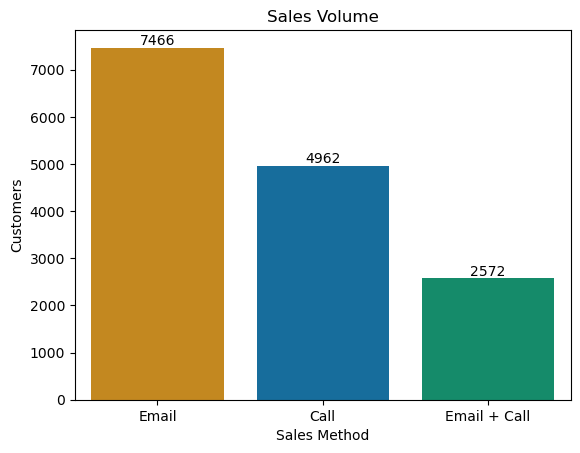

In [44]:
hue_order = ['Call', 'Email', 'Email + Call']

customers_per_method = sns.countplot(data=sales,
                   x='sales_method',
                   hue='sales_method',
                   order=sales['sales_method'].value_counts().index,
                   hue_order=hue_order
                  )
customers_per_method.set(title="Sales Volume",
     xlabel="Sales Method",
     ylabel="Customers")
for container in customers_per_method.containers:
    customers_per_method.bar_label(container)
plt.show()

## 2. What does the spread of the revenue look like overall? And for each method?

The overall distribution of revenue has a very wide spread with strong right skew. The range is 205.78 with a mean of 95.72 and a median of 90. When we use sales method as a color overlay, we can see 3 fairly distinct distributions within the overall distribution with the call only method encompassing revenues below ~75, the email only method encompassing revenues between ~75 and ~140, and the combination method encompassing revenues above ~130, with some overlap between the email only and combination distributions.

In [45]:
sales_method_agg = sales.groupby('sales_method')['revenue'].agg(['mean', 'median', 'var', 'max', 'min', 'sum'])
sales_method_agg.columns = ['Revenue Mean', 'Revenue Median', 'Revenue Variance', 'Revenue Max', 'Revenue Min', 'Revenue Sum']
sales_method_agg.index.name = 'Sales Method'
round(sales_method_agg, 2)

,Revenue Mean,Revenue Median,Revenue Variance,Revenue Max,Revenue Min,Revenue Sum
Sales Method,,,,,,
Call,47.64,49.26,74.17,71.36,32.54,236395.34
Email,97.17,95.79,124.99,148.97,78.83,725439.82
Email + Call,184.23,184.50,847.17,238.32,122.11,473838.05


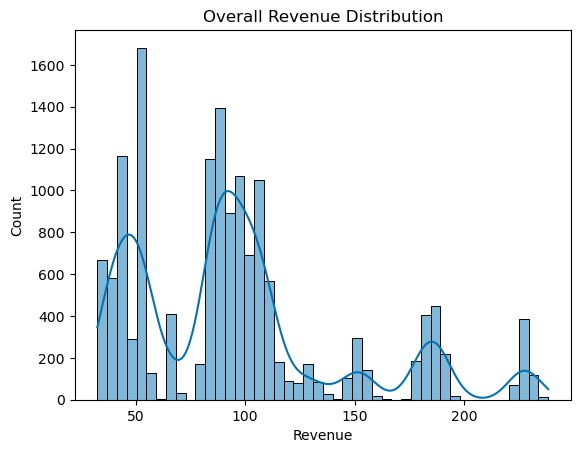

In [46]:
revenue_distribution = sns.histplot(data=sales,
                                    x='revenue',
                                   kde=True)
revenue_distribution.set(title="Overall Revenue Distribution",
                         xlabel="Revenue")
plt.show()

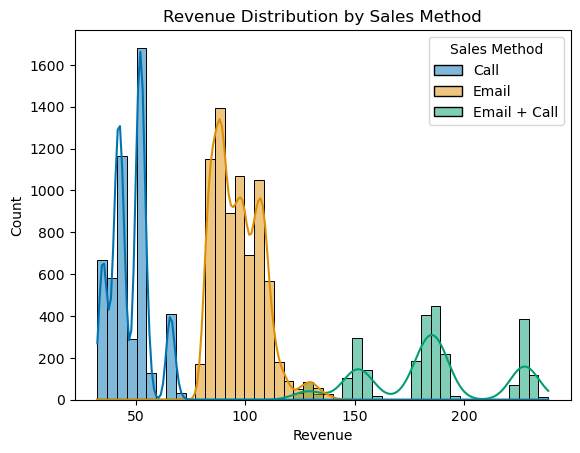

In [47]:
revenue_distribution_by_method = sns.histplot(data=sales,
                                              x='revenue',
                                              hue='sales_method',
                                              hue_order=hue_order,
                                              kde=True
                                             )
revenue_distribution_by_method.set(title="Revenue Distribution by Sales Method",
                                   xlabel="Revenue"
                                  )
revenue_distribution_by_method.get_legend().set_title("Sales Method")
plt.show()

## 3. Was there any difference in revenue over time for each of the methods?
_Important weeks:_
- **Email:** Customers received a second email in _Week 3_.
- **Call:** No further action after Week 1 call.
- **Email + Call:** Customers were called in _Week 1_.

We can see that revenue from the email-only method began extremely high in week 1 (\$246,357.88). This was followed by a precipitous decline with only week 4 showing a positive change in revenue from the previous week, probably due to the second email being sent.
In contrast, both the call only and combination methods accounted for small initial revenues (\$26,796.43 and \$19,077.76, respectively) followed by steady positive growths, although the combination method showed more positive growth (>60% increase each week). All three methods had their largest negative growths in week 6 with the combination method declining the least.

We know that the email-only method captured the highest total sales volume over the 6 weeks, but when examining sales volume week-by-week, we can see that sales volume, similar to revenue totals fell dramatically week after week, ending as the method with the lowest sales volume in week 6. As a reminder, both the email-only and combination method customers received a product launch email in week 0, which means that until the week 1 phone call, those customers experienced the exact same sales method. Despite the identical week 0 sales methods, the email-only sales method strangely captured 5x as many sales as the combination method. One explanation could be that the sales methods were not evenly applied to the same number of customers.

Controlling for sales volume by calculating weekly averages, we can see that **all** weekly revenue averages actually increased week over week, except for week 3, when all three sales methods experienced a decline. We can also see that despite the lower sales volume, the combination method experienced the highest initial revenue per sale (\$128.90) with email-only in second (\$87.52) and call-only in last (\$35.35). The combination method also experienced the most positive average revenue throughout the 6 weeks.

### Growth in Weekly Revenue Total

In [48]:
# Aggregate revenue by sales_method and week
weekly_revenue_totals = sales.groupby(['sales_method','week'])['revenue'].sum().reset_index()

# Pivot revenue data to wide format
weekly_revenue_totals_table = weekly_revenue_totals.pivot(index='week', columns='sales_method', values='revenue')

# Calculate the percent change between weeks
weekly_revenue_totals_change = round(weekly_revenue_totals_table.pct_change() * 100, 2)

# Add the delta information back into the pivot table
weekly_revenue_totals_table = pd.concat([weekly_revenue_totals_table.add_suffix(' Revenue'), weekly_revenue_totals_change.add_suffix(' Revenue % Change')], axis=1)
weekly_revenue_totals_table.index.name = 'Week'
weekly_revenue_totals_table

sales_method,Call Revenue,Email Revenue,Email + Call Revenue,Call Revenue % Change,Email Revenue % Change,Email + Call Revenue % Change
Week,,,,,,
1,26796.430,246357.880,19077.76,NaN,NaN,NaN
2,35095.390,148764.060,30794.85,30.97,-39.61,61.42
3,37666.240,106781.460,54031.24,7.33,-28.22,75.46
4,51716.340,116924.715,89692.34,37.30,9.50,66.00
5,55479.730,80823.220,147493.30,7.28,-30.88,64.44
6,29641.215,25788.490,132748.56,-46.57,-68.09,-10.00


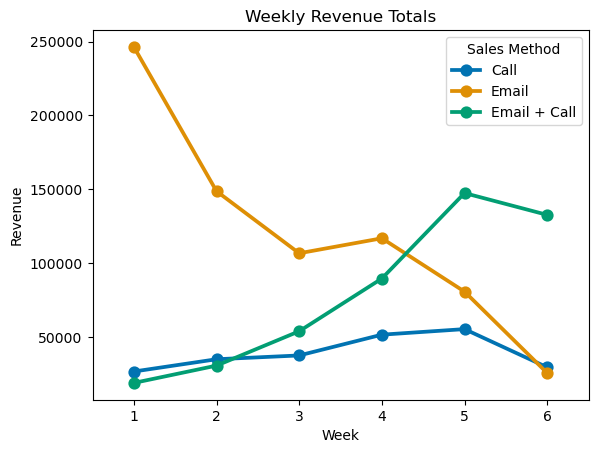

In [49]:
revenue_per_week = sns.pointplot(data=weekly_revenue_totals, x='week', y='revenue', hue='sales_method', hue_order=hue_order)
revenue_per_week.set(title="Weekly Revenue Totals", xlabel="Week", ylabel="Revenue")
revenue_per_week.get_legend().set_title("Sales Method")
plt.show()

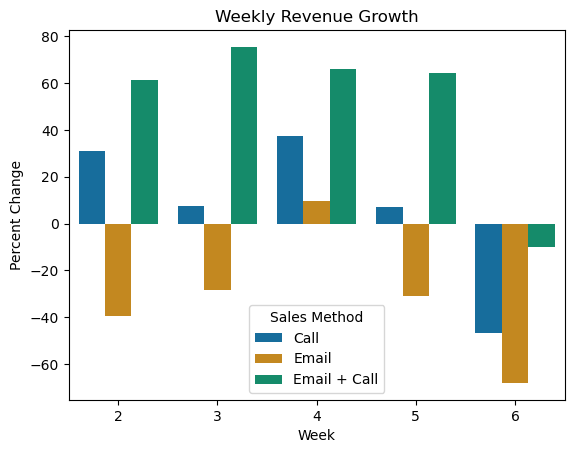

In [50]:
weekly_revenue_totals_change_long = weekly_revenue_totals_change.reset_index().melt(id_vars='week', var_name='sales_method', value_name='percent_change')

weekly_revenue_growth = sns.barplot(data=weekly_revenue_totals_change_long[weekly_revenue_totals_change_long['week'] != 1], x='week', y='percent_change', hue='sales_method', hue_order=hue_order)
weekly_revenue_growth.set(title="Weekly Revenue Growth", xlabel="Week", ylabel="Percent Change")
weekly_revenue_growth.get_legend().set_title("Sales Method")
plt.show()

### Growth in Weekly Revenue Volume

In [51]:
weekly_sales_volume = sales.groupby(['week', 'sales_method']).size().reset_index(name='count')

# Pivot revenue data to wide format
weekly_sales_volume_table = weekly_sales_volume.pivot(index='week', columns='sales_method', values='count')

# Calculate the delta between weeks
weekly_sales_volume_change = round(weekly_sales_volume_table.pct_change() * 100, 2)

# Add the delta information back into the pivot table
weekly_sales_volume_table = pd.concat([weekly_sales_volume_table.add_suffix(' Sales Volume'), weekly_sales_volume_change.add_suffix(' Sales Volume % Change')], axis=1)
weekly_sales_volume_table.index.name = 'Week'
weekly_sales_volume_table

sales_method,Call Sales Volume,Email Sales Volume,Email + Call Sales Volume,Call Sales Volume % Change,Email Sales Volume % Change,Email + Call Sales Volume % Change
Week,,,,,,
1,758,2815,148,NaN,NaN,NaN
2,805,1486,200,6.20,-47.21,35.14
3,902,1150,359,12.05,-22.61,79.50
4,1005,1075,495,11.42,-6.52,37.88
5,1044,743,787,3.88,-30.88,58.99
6,448,197,583,-57.09,-73.49,-25.92


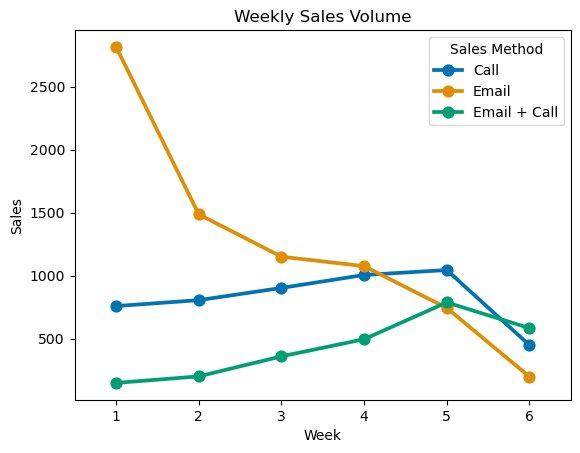

In [52]:
weekly_sales_volume_by_method = sns.pointplot(data=weekly_sales_volume, x='week', y='count', hue='sales_method', hue_order=hue_order)
weekly_sales_volume_by_method.set(title="Weekly Sales Volume", xlabel="Week", ylabel="Sales")
weekly_sales_volume_by_method.get_legend().set_title("Sales Method")
plt.show()

### Growth in Weekly Revenue Average

In [53]:
# Aggregate revenue by sales_method and week
weekly_revenue_avgs = sales.groupby(['sales_method','week'])['revenue'].mean().round(2).reset_index()

# Pivot revenue data to wide format
weekly_revenue_avgs_table = weekly_revenue_avgs.pivot(index='week', columns='sales_method', values='revenue')

# Calculate the delta between weeks
weekly_revenue_avgs_change = round(weekly_revenue_avgs_table.pct_change() * 100, 2)

# Add the delta information back into the pivot table
weekly_revenue_avgs_table = pd.concat([weekly_revenue_avgs_table.add_suffix(' Revenue Average'), weekly_revenue_avgs_change.add_suffix(' Revenue Average % Change')], axis=1)
weekly_revenue_avgs_table.index.name = 'Week'
weekly_revenue_avgs_table

sales_method,Call Revenue Average,Email Revenue Average,Email + Call Revenue Average,Call Revenue Average % Change,Email Revenue Average % Change,Email + Call Revenue Average % Change
Week,,,,,,
1,35.35,87.52,128.90,NaN,NaN,NaN
2,43.60,100.11,153.97,23.34,14.39,19.45
3,41.76,92.85,150.50,-4.22,-7.25,-2.25
4,51.46,108.77,181.20,23.23,17.15,20.40
5,53.14,108.78,187.41,3.26,0.01,3.43
6,66.16,130.91,227.70,24.50,20.34,21.50


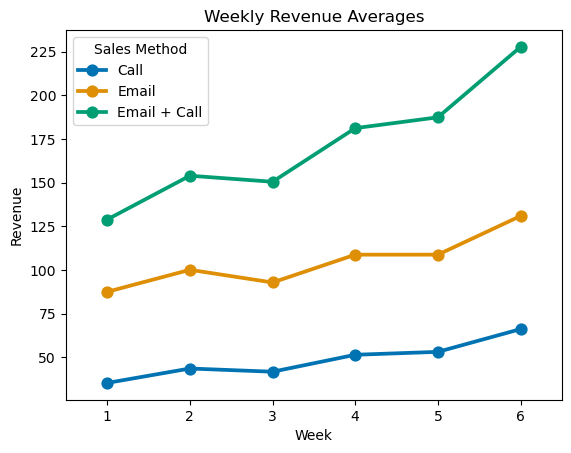

In [54]:
avg_revenue_per_week = sns.pointplot(data=weekly_revenue_avgs, x='week', y='revenue', hue='sales_method')
avg_revenue_per_week.set(title="Weekly Revenue Averages", xlabel="Week", ylabel="Revenue")
avg_revenue_per_week.get_legend().set_title("Sales Method")
plt.show()

## 4. Based on the data, which method would you recommend we continue to use?

Based on the data, I would recommend that we use the Email + Call combination method. This recommendation is made under the assumption that the three sales methods were not evenly applied to customers. While the email only method captured the highest total number of customers/total revenue (and would otherwise be my recommendation), this is only due to its enormous initial sales volume in week 1. In theory, the combination method is capable of capturing an equivalent initial volume. There should be no logical difference in week 1 between the two email methods as customers from both segments experienced what was effectively the same sales method at product launch (week 0). To demonstrate this, I sampled from each method to create equal populations and it's clear to see that it doesn't take long for the combination method to outpace the email-only method.

The reason I'm recommending the combination method over email-only is the change in revenue over time between the methods. The email-only method exhibited a concerning decline in total revenue growth while the combination method exhibited excellent total revenue growth. The combination method also demonstrated superior average revenue growth as well as a higher initial revenue per sale in week 1.

The call only method exhibited the poorest metrics in volume and growth of both total and average revenue, while also being the most resource intensive, so we can unquivocally dismiss the method.

In order to confirm these results, we must determine if the differences between the email-only and combination methods are statistically significant. We already know that revenue between the sales methods is not normally distributed, so we utilized the non-parametric Mann-Whitney U test to compare distributions. Using a significance level of 0.05, we returned a p-value of 2.81e-143, therefore we can confirm that the difference in results is statistically significant.

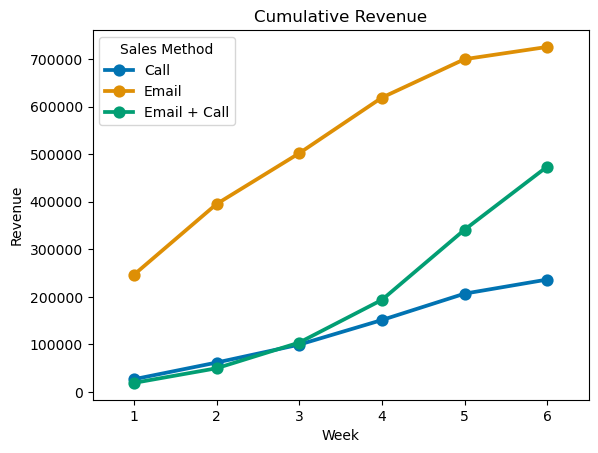

In [55]:
sales['cum_revenue'] = sales.sort_values(['sales_method', 'week']).groupby('sales_method')['revenue'].cumsum()
max_cumsum_per_week = sales.groupby(['sales_method','week'])['cum_revenue'].max().reset_index()

# Plot the maximum cumulative revenue per week
cum_revenue = sns.pointplot(data=max_cumsum_per_week, x='week', y='cum_revenue', hue='sales_method', hue_order=hue_order)

cum_revenue.set(title="Cumulative Revenue", xlabel="Week", ylabel="Revenue")
cum_revenue.get_legend().set_title("Sales Method")

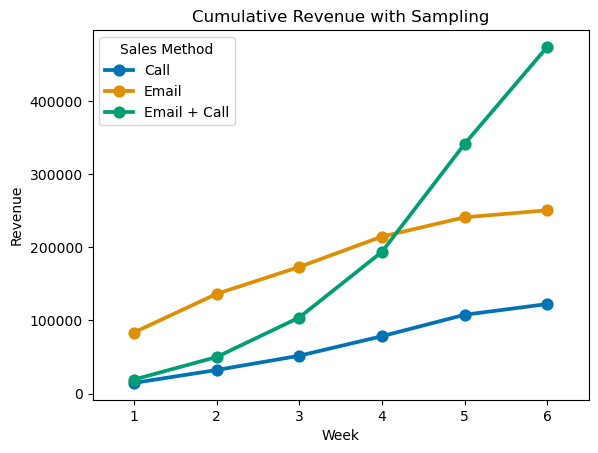

In [56]:
min_size = sales['sales_method'].value_counts().min()

# Sample the same number of rows (min_size) from each population
sales_sampled = sales.groupby('sales_method').sample(n=min_size, random_state=42)

sales_sampled['cum_revenue'] = sales_sampled.sort_values(['sales_method', 'week']).groupby('sales_method')['revenue'].cumsum()
max_cumsum_per_week_sampled = sales_sampled.groupby(['sales_method','week'])['cum_revenue'].max().reset_index()

# Plot the maximum cumulative revenue per week
cum_revenue_sampled = sns.pointplot(data=max_cumsum_per_week_sampled, x='week', y='cum_revenue', hue='sales_method', hue_order=hue_order)
cum_revenue_sampled.set(title="Cumulative Revenue with Sampling", xlabel="Week", ylabel="Revenue")
cum_revenue_sampled.get_legend().set_title("Sales Method")
plt.show()

In [57]:
anova_stat, p_val = stats.mannwhitneyu(sales[sales['sales_method'] == 'Email']['nb_site_visits'],
                                       sales[sales['sales_method'] == 'Email + Call']['nb_site_visits'])
print(f"Mann-Whitney U Test Results for nb_site_visits: p-value={p_val:}")
if p_val < 0.05:
    print(f"  -> Reject the null hypothesis. There IS a significant difference between population medians.")
else:
    print(f"  -> Fail to reject the null hypothesis. There is NOT a significant difference between population medians.")

Mann-Whitney U Test Results for nb_site_visits: p-value=2.81497662546974e-143
  -> Reject the null hypothesis. There IS a significant difference between population medians.


# Definition of a Metric for the Business to Monitor
The metric that we should be monitoring is **weekly revenue growth** especially beyond 6 weeks. Once again operating under the assumption that the sales methods were not equally applied, we can assume very little about what the initial sales volume will look like. On the other hand, we do know that weekly revenue growth can forecast sales beyond initial revenue volume and therefore inform business strategy. Initial revenue growth for the recommended combination sales method segment was 61.42% after week 1 and increased from there. We can also see that in week 6, all sales method segments experienced negative growth, but the combination sales method experienced the smallest negative growth by far. By tracking weekly revenue growth, we can also determine the point of diminishing returns from our sales methods. Once we've reached that point, we'll be able to more accurately forecast weekly cumulative revenue.

**Initial Weekly Revenue Growth**
- Call: +23.34%
- Email: -39.61%
- Email + Call: +61.42%

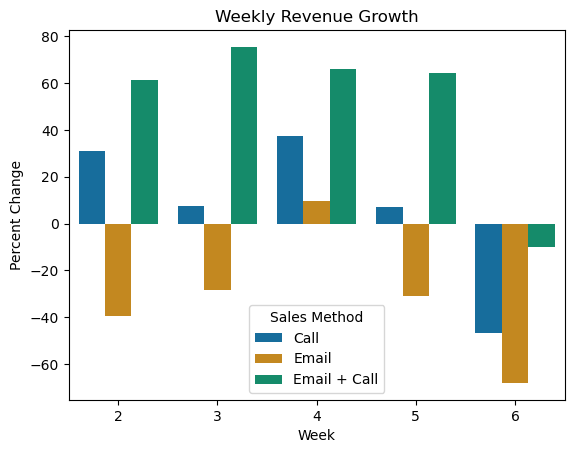

In [58]:
# Unpivot percent change column
weekly_revenue_totals_change_long = pd.melt(weekly_revenue_totals_change.reset_index().iloc[1:], id_vars=['week'], value_name='percent_change')

weekly_revenue_growth = sns.barplot(weekly_revenue_totals_change_long, x='week', y='percent_change', hue='sales_method')
weekly_revenue_growth.set(title="Weekly Revenue Growth", xlabel="Week", ylabel="Percent Change")
weekly_revenue_growth.get_legend().set_title("Sales Method")
plt.show()

# Final Summary

- Email method <- _Would-be recommendation based solely on cumulative revenue and discounting the count of customers contacted_
    - 50% of customers
    - negative weekly revenue growth
    - middling weekly revenue per order
    - least resource intensive
- Call method
    - 33% of customers
    - middling weekly revenue growth
    - smallest weekly revenue per order
    - most resource intensive
- Email + Call method <- **Recommendation**
    - 17% of customers
    - largest weekly revenue growth
    - largest weekly revenue per order
    - 67% less resource intensive than Call method

Hypothesis testing: There **is** a statistically significant difference between revenue distributions of the email-only and combination methods.

**Recommendations:**
- Begin to use the Email + Call combination method as the business's primary sales method. Further analysis can be done to find the ideal time delay between the initial email and follow up phone call to maximize revenue.
- The email-only method can continue to be utilized due to its low resource requirement. It can also be transformed into a hybrid method with a phone call after the second email if sales continue to decline.
- Discontinue the call method and reallocate resources to more productive strategies.
- Improve data collection:
    - Continue tracking weekly revenue growth beyond 6 weeks to find out if the week 6 decline in sales growth is part of a larger trend.
    - Include data on how many customers were targeted so that a conversion rate can be established
    - Include individual product information and pricing for further segmentation/analysis